# **Data-Driven Farming Decisions**

In this project, we assist a farmer in selecting the most suitable crop for his field based on critical soil measurements. Due to budget constraints, the farmer can only afford to measure one of four essential soil properties:<br>
Nitrogen Content Ratio<br>
Phosphorous Content Ratio<br>
Potassium Content Ratio<br>
pH Value of the Soil<br>
This scenario presents a classic feature selection problem in machine learning, where the goal is to identify the most significant feature that can accurately predict the optimal crop type.

In [78]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pickle

In [79]:
df = pd.read_csv("/content/drive/MyDrive/soil_measures.csv")

## Data Exploration

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [81]:
df["crop"].value_counts()

,count
crop,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [82]:
#Missing Values
df.isna().sum()

,0
N,0
P,0
K,0
ph,0
crop,0


In [83]:
# Summary Statistics
df.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [ ]:
# Encoding Variables
label_encoder = LabelEncoder()
df['Crop_encoded'] = label_encoder.fit_transform(df['crop'])

## Feature Selection

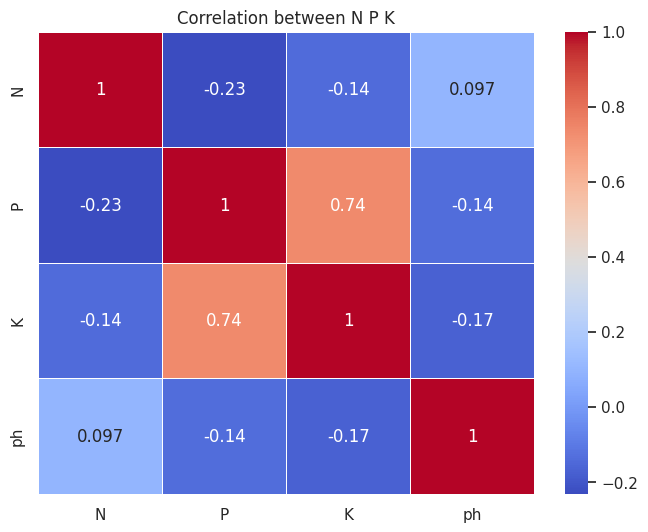

In [84]:
# Check the collinarity
correlation_matrix = df[['N', 'P', 'K', 'ph']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between N P K")
plt.show()

There is a strong correlation between Phosphorous (P) and Potassium (K). This indicates that these two variables are closely related.

In [86]:
X = df[["N", "P", "K", "ph"]]
y = df["Crop_encoded"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Features Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
feature_names = ["N", "P", "K", "ph"]  # List of feature names

for feature_name in feature_names:
    feature_index = feature_names.index(feature_name) # Get the numerical index of the feature
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train[:, [feature_index]], y_train)  # Fit model using a single feature's index
    y_pred = model.predict(X_test[:, [feature_index]])  # Predict using the same feature's index
    f_error = f1_score(y_test, y_pred, average='weighted')  # Calculate F1-score
    print(f"F1-score for {feature_name}: {f_error}")

F1-score for N: 0.1457441336696003
F1-score for P: 0.2122829807527472
F1-score for K: 0.30604986326799966
F1-score for ph: 0.13933118415602644


The F1-scores presented here provide an understanding of how well each individual soil feature (Nitrogen, Phosphorous, Potassium, pH) contributes to predicting the crop type when used in isolation with a Random Forest Classifier.<br>
Potassium shows the best performance out of the four features, with an F1-score of 0.306. This indicates that Potassium is the strongest individual predictor of crop type among the features, though it is still relatively weak when used in isolation.

In [90]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


The accuracy of predicting crop type using all the soil features (N, P, K, pH) combined is quite promising. However, since we need to select only one feature, we will assess feature importance using the Random Forest classifier to identify the most significant predictor.

In [91]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

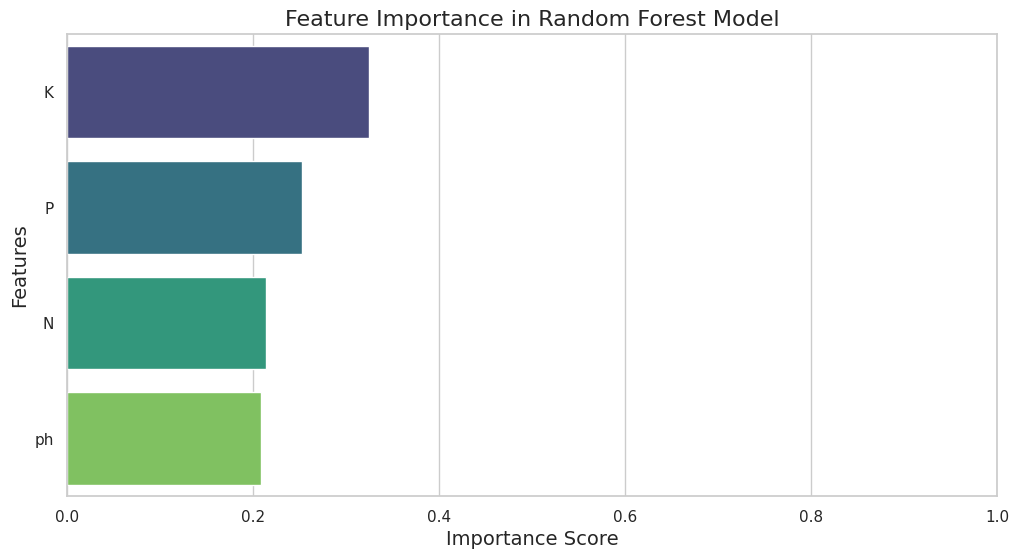

In [97]:
sns.set(style="whitegrid")
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)

# Add labels and title
plt.title('Feature Importance in Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlim(0, 1)
plt.show()

Potassium (K) has the highest importance score, indicating that it is the most critical feature for predicting crop type. However, the model's accuracy is still very low compared to a perfect model, where the accuracy would approach 1.

In [93]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# the last model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [94]:
model_filename = "crop_prdiction.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved as {model_filename}")

Model saved as crop_prdiction.pkl
